Importance Sampler

https://blog.csdn.net/geter_CS/article/details/85068407

https://blog.csdn.net/i_dovelemon/article/details/76786741

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib inline
# 可旋转plot
%matplotlib notebook

In [39]:
def radicalInverseBase2(v):
    x = 0.0
    f = 0.5
    v = int(v)
    while v != 0:
        x += f * (v & 1)
        v = math.floor(v / 2)
        f *= 0.5
    return x

def hammersleySampler(num):
    U = []
    V = []
    for i in range(num):
        x = i / num
        y = radicalInverseBase2(i)
        U.append(x)
        V.append(y)
    return U, V

def hemisphereCoordinates(num, mapper):
    U,V = hammersleySampler(num)
    X,Y,Z = [],[],[]
    for i in range(num):
        x,y,z = mapper(U[i],V[i])
        X.append(x)
        Y.append(y)
        Z.append(z)        
    return X, Y, Z

def plotScatterToHemisphere(num, mapper, title):
    # 定义figure
    fig = plt.figure()
    # 将figure变为3d
    ax = Axes3D(fig)
    X,Y,Z = hemisphereCoordinates(num, mapper)
    ax.scatter(X, Y, Z, c='r', marker='o', s=10)
    ax.set_zlim(0, 1)
    ax.set_title(title, alpha=0.6, color="b", size=16, weight='bold', backgroundcolor="y")
    plt.show()

<IPython.core.display.Javascript object>


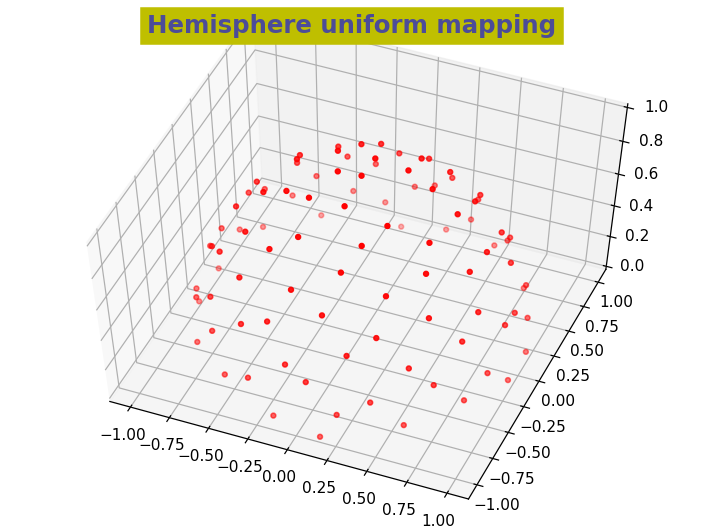

In [46]:
def mapper_hemisphere_uniform(u, v):
    phi = 2.0 * np.pi * v
    cosTheta = 1 - u
    sinTheta = math.sqrt(1.0 - cosTheta * cosTheta)
    x = math.cos(phi) * sinTheta
    y = math.sin(phi) * sinTheta
    z = cosTheta
    return x, y, z

plotScatterToHemisphere(100, mapper_hemisphere_uniform, "Hemisphere uniform mapping")

<IPython.core.display.Javascript object>


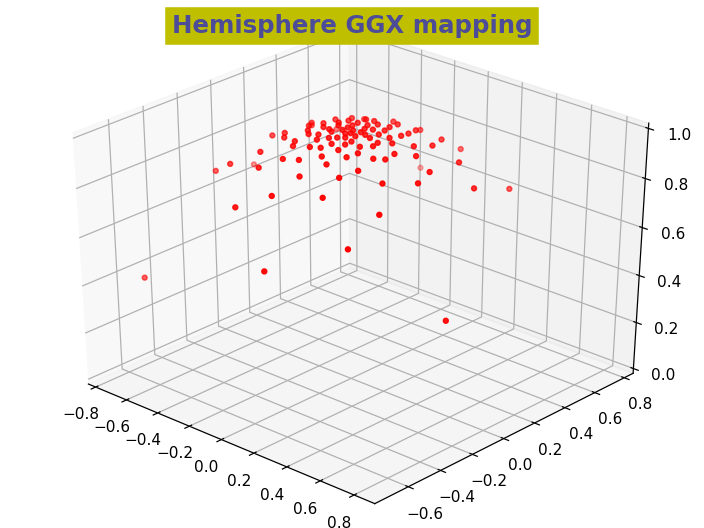

In [77]:
roughness = 0.5
def mapper_hemisphere_GGX(u, v):
    a = roughness * roughness    
    phi = u * 2.0 * np.pi
    cosTheta = math.sqrt((1 - v) / (1 + (a * a - 1) * v));
    sinTheta = math.sqrt(1.0 - cosTheta * cosTheta)
    x = math.cos(phi) * sinTheta
    y = math.sin(phi) * sinTheta
    z = cosTheta
    return x, y, z

plotScatterToHemisphere(100, mapper_hemisphere_GGX, "Hemisphere GGX mapping")

<IPython.core.display.Javascript object>


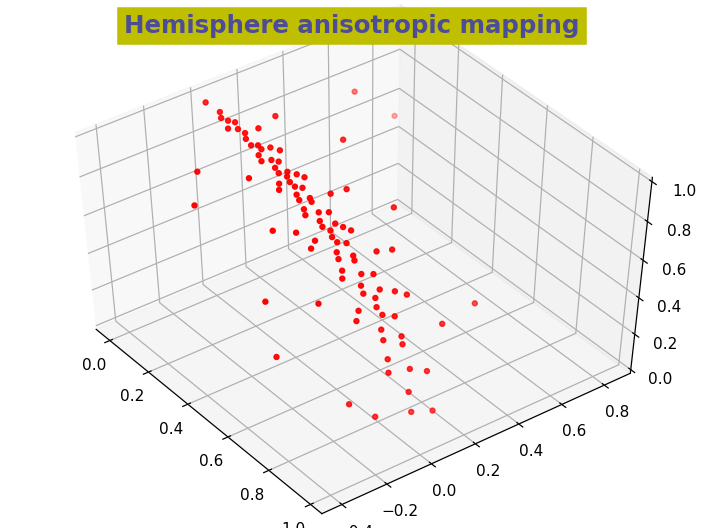

In [79]:
ax = 0.1
ay = 1.5
r = 2
def mapper_hemisphere_anisotropic(u, v):    
    phi = math.atan(ax/ay * math.tan(2.0 * np.pi * u))
    cosTheta = math.sqrt((1 - v) / (1 + (1 / r - 1) * v));
    sinTheta = math.sqrt(1.0 - cosTheta * cosTheta)
    x = math.cos(phi) * sinTheta
    y = math.sin(phi) * sinTheta
    z = cosTheta
    return x, y, z

plotScatterToHemisphere(100, mapper_hemisphere_anisotropic, "Hemisphere anisotropic mapping")